In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import math

In [2]:
mitbih = pd.read_csv("mitbih_test.csv", header = None)
mitbih_train = pd.read_csv("mitbih_train.csv", header = None)

In [3]:
data = mitbih_train.iloc[:, :186].values
labels = mitbih_train.iloc[:, 187].values

mitbih[187]=mitbih[187].astype(int)
equilibre=mitbih[187].value_counts()
print("Ukupno:")
print("U klasi normalnih                      : ", equilibre[0])
print("U klasi supraventrikularnih ektopičnih : ", equilibre[1])
print("U klasi ventrikularnih ektopičnih      : ", equilibre[2])
print("U klasi spojenih                       : ", equilibre[3])
print("U klasi nepoznatih                     : ", equilibre[4])

Ukupno:
U klasi normalnih                      :  18118
U klasi supraventrikularnih ektopičnih :  556
U klasi ventrikularnih ektopičnih      :  1448
U klasi spojenih                       :  162
U klasi nepoznatih                     :  1608


In [ ]:
#Dataset skew, undersampling
#Izvrsiti ovu celiju ako se koristi undersampling

mitbih_train[187]=mitbih_train[187].astype(int)
equilibre=mitbih_train[187].value_counts()
print(equilibre)

df_0=mitbih_train[mitbih_train[187]==0]
df_1=mitbih_train[mitbih_train[187]==1]
df_2=mitbih_train[mitbih_train[187]==2]
df_3=mitbih_train[mitbih_train[187]==3]
df_4=mitbih_train[mitbih_train[187]==4]

#Undersampling
df_0_under = df_0.sample(2*6431)
df_under = pd.concat([df_0_under, df_1, df_2, df_3, df_4], axis=0)

equilibre=df_under[187].value_counts()
print("Ukupno:")
print("U klasi normalnih                      : ", equilibre[0])
print("U klasi supraventrikularnih ektopičnih : ", equilibre[1])
print("U klasi ventrikularnih ektopičnih      : ", equilibre[2])
print("U klasi spojenih                       : ", equilibre[3])
print("U klasi nepoznatih                     : ", equilibre[4])

data = df_under.iloc[:, :186].values
labels = df_under.iloc[:, 187]

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64
Ukupno:
U klasi normalnih                      :  12862
U klasi supraventrikularnih ektopičnih :  2223
U klasi ventrikularnih ektopičnih      :  5788
U klasi spojenih                       :  641
U klasi nepoznatih                     :  6431


In [ ]:
#Dataset skew, oversampling
#Izvrsiti ovu celiju ako se koristi oversampling

mitbih_train[187]=mitbih_train[187].astype(int)
equilibre=mitbih_train[187].value_counts()
print(equilibre)

df_0=mitbih_train[mitbih_train[187]==0]
df_1=mitbih_train[mitbih_train[187]==1]
df_2=mitbih_train[mitbih_train[187]==2]
df_3=mitbih_train[mitbih_train[187]==3]
df_4=mitbih_train[mitbih_train[187]==4]

#Oversampling
df_1_over = df_1.sample(72471, replace = True)
df_2_over = df_2.sample(72471, replace = True)
df_3_over = df_3.sample(72471, replace = True)
df_4_over = df_4.sample(72471, replace = True)

df_over = pd.concat([df_0, df_1_over, df_2_over, df_3_over, df_4_over], axis=0)

equilibre=df_over[187].value_counts()
print("Ukupno:")
print("U klasi normalnih                      : ", equilibre[0])
print("U klasi supraventrikularnih ektopičnih : ", equilibre[1])
print("U klasi ventrikularnih ektopičnih      : ", equilibre[2])
print("U klasi spojenih                       : ", equilibre[3])
print("U klasi nepoznatih                     : ", equilibre[4])

data = df_under.iloc[:, :186].values
labels = df_under.iloc[:, 187]

In [39]:
from keras.utils import to_categorical

one_hot_labels = np.zeros((len(labels), 5))
one_hot_labels[:] = to_categorical(labels[:], num_classes = 5)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, one_hot_labels, test_size = 0.33, random_state = 42)

In [41]:
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, BatchNormalization, Dropout, Convolution1D, MaxPooling1D, SeparableConv1D, Flatten, MaxPool1D
from keras.optimizers import Adam
from keras.models import Model

X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

im_shape=(X_train.shape[1],1)
inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
conv1_1=BatchNormalization()(conv1_1)
pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
conv2_1=BatchNormalization()(conv2_1)
pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
conv3_1=BatchNormalization()(conv3_1)
pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
flatten=Flatten()(pool3)
dense_end1 = Dense(64, activation='relu')(flatten)
dense_end2 = Dense(32, activation='relu')(dense_end1)
main_output = Dense(5, activation='softmax', name='main_output')(dense_end2)

In [42]:
model = Model(inputs= inputs_cnn, outputs=main_output)

In [43]:
model.compile(optimizer = Adam(lr = 100e-5), loss = "categorical_crossentropy", metrics = ["accuracy"])

In [44]:
EPOCHS = 5
history = model.fit(X_train, y_train, validation_split = 0.2, epochs = EPOCHS, shuffle = True, class_weight = 'auto')

Train on 14978 samples, validate on 3745 samples
Epoch 1/5
14978/14978 [==============================] - 17s 1ms/step - loss: 0.3419 - accuracy: 0.8887 - val_loss: 1.1158 - val_accuracy: 0.4662
Epoch 2/5
14978/14978 [==============================] - 17s 1ms/step - loss: 0.1928 - accuracy: 0.9362 - val_loss: 0.2197 - val_accuracy: 0.9276
Epoch 3/5
14978/14978 [==============================] - 16s 1ms/step - loss: 0.1501 - accuracy: 0.9482 - val_loss: 0.2098 - val_accuracy: 0.9311
Epoch 4/5
14978/14978 [==============================] - 16s 1ms/step - loss: 0.1274 - accuracy: 0.9551 - val_loss: 0.2023 - val_accuracy: 0.9364
Epoch 5/5
14978/14978 [==============================] - 16s 1ms/step - loss: 0.1086 - accuracy: 0.9617 - val_loss: 0.1801 - val_accuracy: 0.9469


In [45]:
print(model.evaluate(X_test, y_test))

9222/9222 [==============================] - 3s 291us/step
[0.166289947225729, 0.9510952234268188]


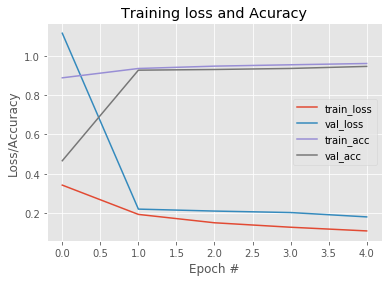

In [46]:
N = np.arange(0, EPOCHS)
title = "Training loss and Acuracy"

plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label = "train_loss")
plt.plot(N, history.history["val_loss"], label = "val_loss")
plt.plot(N, history.history["accuracy"], label = "train_acc")
plt.plot(N, history.history["val_accuracy"], label = "val_acc")
plt.title(title)
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs_cnn (InputLayer)      (None, 186, 1)            0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 181, 64)           448       
_________________________________________________________________
batch_normalization_7 (Batch (None, 181, 64)           256       
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 91, 64)            0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 89, 64)            12352     
_________________________________________________________________
batch_normalization_8 (Batch (None, 89, 64)            256       
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 45, 64)            0   

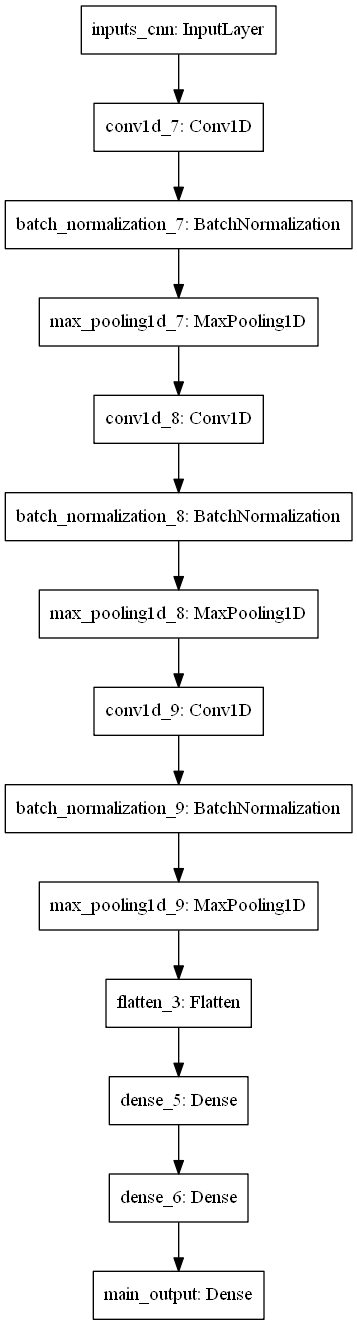

In [47]:
import pydot
from keras.utils.vis_utils import plot_model

print(model.summary())

import keras

import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

from keras.utils.vis_utils import model_to_dot
keras.utils.vis_utils.pydot = pydot

plot_model(model, to_file='cnn_mitbih.png')

In [48]:
data_validation = mitbih.iloc[:, :186].values
labels_validation = mitbih.iloc[:, 187]

one_hot_labels_validation = np.zeros((len(labels_validation), 5))
one_hot_labels_validation[:] = to_categorical(labels_validation[:], num_classes = 5)

data_validation = data_validation.reshape(len(data_validation), data_validation.shape[1],1)

predictions = model.predict(data_validation)
predictions = np.where(predictions < 0.5, 0, 1)

In [49]:
import sklearn
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

accuracy = sklearn.metrics.accuracy_score(one_hot_labels_validation, predictions)

print("Accuracy: {0:.2f}".format(100.0 * accuracy_score(one_hot_labels_validation, predictions)))
print("Precision: {0:.2f}".format(100.0 * precision_score(one_hot_labels_validation, predictions, average='micro')))
print("F1 score: {0:.2f}".format(100.0 * f1_score(one_hot_labels_validation, predictions, average='micro')))

print('Classification Report:')
print(sklearn.metrics.classification_report(one_hot_labels_validation, predictions))

Accuracy: 95.41
Precision: 95.91
F1 score: 95.66
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98     18118
           1       0.61      0.78      0.69       556
           2       0.91      0.91      0.91      1448
           3       0.48      0.83      0.61       162
           4       0.90      0.98      0.94      1608

   micro avg       0.96      0.95      0.96     21892
   macro avg       0.78      0.89      0.83     21892
weighted avg       0.97      0.95      0.96     21892
 samples avg       0.95      0.95      0.95     21892



C:\Users\damja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


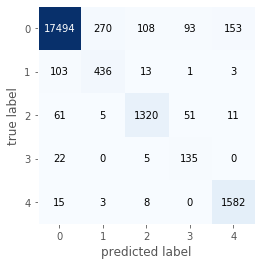

In [50]:
from mlxtend.evaluate import confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

validation_numerical = np.argmax(one_hot_labels_validation, axis = 1)
predictions_numerical = np.argmax(predictions, axis = 1)

cm = confusion_matrix(y_target=validation_numerical, 
                      y_predicted=predictions_numerical, 
                      binary=False)
cm
fig, ax = plot_confusion_matrix(cm)
plt.show()